<a href="https://colab.research.google.com/github/yudhead/Mesin-Learning/blob/main/kuis_mensin_learning_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
!pip install -q ucimlrepo

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

In [26]:
adult_income = fetch_ucirepo(id=2)

In [27]:
X = adult_income.data.features
y = adult_income.data.targets

# Concate Features and Target
df = pd.concat([X, y], axis=1)

# Show Top 5
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [28]:
df.shape

(48842, 15)

In [29]:
adult_income.metadata

{'uci_id': 2,
 'name': 'Adult',
 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult',
 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv',
 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ',
 'area': 'Social Science',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 48842,
 'num_features': 14,
 'feature_types': ['Categorical', 'Integer'],
 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'],
 'target_col': ['income'],
 'index_col': None,
 'has_missing_values': 'yes',
 'missing_values_symbol': 'NaN',
 'year_of_dataset_creation': 1996,
 'last_updated': 'Tue Sep 24 2024',
 'dataset_doi': '10.24432/C5XW20',
 'creators': ['Barry Becker', 'Ronny Kohavi'],
 'intro_paper': None,
 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was ex

SOAL 1




In [30]:
missing_profile = (
    df.isnull()
      .sum()
      .reset_index()
      .rename(columns={'index': 'variable', 0: 'missing_count'})
)
missing_profile = missing_profile[missing_profile['missing_count'] > 0]
missing_profile


,variable,missing_count
1,workclass,963
6,occupation,966
13,native-country,274


In [31]:
print("Missing sebelum imputasi:")
print(df.isnull().sum()[df.isnull().sum() > 0])

df.fillna({
    'workclass': df['workclass'].mode()[0],
    'occupation': df['occupation'].mode()[0],
    'native-country': df['native-country'].mode()[0]
}, inplace=True)

print("\nMissing setelah imputasi:")
print(df.isnull().sum()[df.isnull().sum() > 0])


Missing sebelum imputasi:
workclass         963
occupation        966
native-country    274
dtype: int64

Missing setelah imputasi:
Series([], dtype: int64)


In [32]:
categorical_cols = df.select_dtypes(include=['object']).columns

df[categorical_cols] = df[categorical_cols].apply(lambda x: x.str.strip())

df['native-country'] = df['native-country'].replace({'Holand-Netherlands': 'Netherlands', '?': 'Others'})
df['workclass']      = df['workclass'].replace({'?': 'Others'})
df['occupation']     = df['occupation'].replace({'?': 'Others'})

for col in categorical_cols:
    print(f"\n{col} unique values:")
    print(df[col].unique())



workclass unique values:
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Others' 'Self-emp-inc' 'Without-pay' 'Never-worked']

education unique values:
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']

marital-status unique values:
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']

occupation unique values:
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' 'Others'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']

relationship unique values:
['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']

race unique values:
['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']

sex unique values:
['Male' 'Female']



/tmp/ipython-input-2791277742.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='education', data=df, order=df['education'].value_counts().index, palette='viridis', ax=axes[0,1])
/tmp/ipython-input-2791277742.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='income', y='hours-per-week', data=df, palette='Set2', ax=axes[1,0])


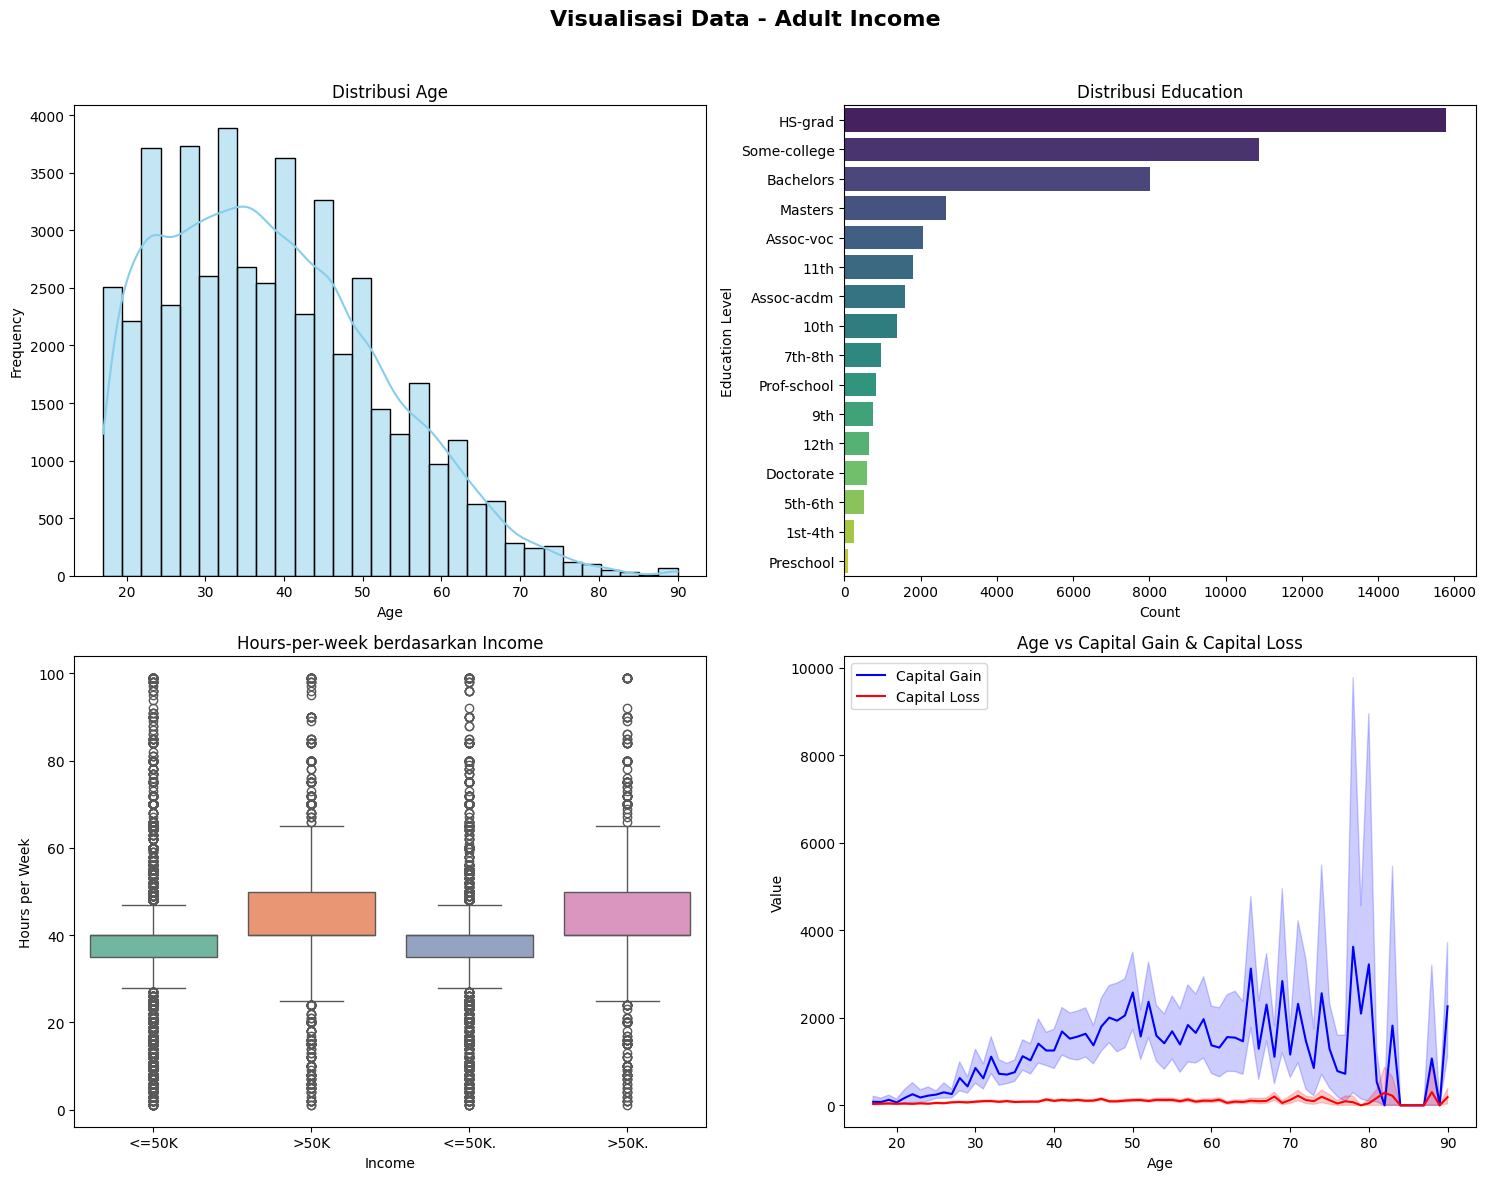

In [34]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle("Visualisasi Data - Adult Income", fontsize=16, fontweight="bold")

#1.Histogram Age
sns.histplot(df['age'], bins=30, kde=True, color='skyblue', ax=axes[0,0])
axes[0,0].set_title("Distribusi Age")
axes[0,0].set_xlabel("Age")
axes[0,0].set_ylabel("Frequency")

#2.Bar chart Education
sns.countplot(y='education', data=df, order=df['education'].value_counts().index, palette='viridis', ax=axes[0,1])
axes[0,1].set_title("Distribusi Education")
axes[0,1].set_xlabel("Count")
axes[0,1].set_ylabel("Education Level")

#3.Boxplot Income vs Hours-per-week
sns.boxplot(x='income', y='hours-per-week', data=df, palette='Set2', ax=axes[1,0])
axes[1,0].set_title("Hours-per-week berdasarkan Income")
axes[1,0].set_xlabel("Income")
axes[1,0].set_ylabel("Hours per Week")

#4.Lineplot Age vs Capital-Gain & Capital-Loss
sns.lineplot(x='age', y='capital-gain', data=df, label='Capital Gain', color='blue', ax=axes[1,1])
sns.lineplot(x='age', y='capital-loss', data=df, label='Capital Loss', color='red', ax=axes[1,1])
axes[1,1].set_title("Age vs Capital Gain & Capital Loss")
axes[1,1].set_xlabel("Age")
axes[1,1].set_ylabel("Value")
axes[1,1].legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [ ]:
#1. Fenomena pada distribusi data age
#Data usia terkonsentrasi pada usia produktif, dengan sedikit data usia tua Mayoritas berada di
#rentang 20–50 tahun menunjukkan bahwa data didominasi oleh usia produktif.

In [ ]:
#2.Strategi jika ada missing value pada age
#Saya akan pilih median imputasi, karena distribusi age skewed dan median lebih representatif untuk mengisi missing value.

In [ ]:
#3.Jumlah outlier pada setiap kategori income (berdasarkan hours-per-week)
#Outlier paling banyak ada pada kelompok <=50K, dengan jumlah lebih besar dibanding >50K

In [35]:
# Encoding kolom sex
df['sex'] = df['sex'].map({'Male': 1, 'Female': 0})

# Encoding kolom income (target)
df['income'] = df['income'].map({'>50K': 1, '<=50K': 0})

# Cek hasil
print(df[['sex', 'income']].head())
print("\nDistribusi sex:\n", df['sex'].value_counts())
print("\nDistribusi income:\n", df['income'].value_counts())


   sex  income
0    1     0.0
1    1     0.0
2    1     0.0
3    1     0.0
4    0     0.0

Distribusi sex:
 sex
1    32650
0    16192
Name: count, dtype: int64

Distribusi income:
 income
0.0    24720
1.0     7841
Name: count, dtype: int64


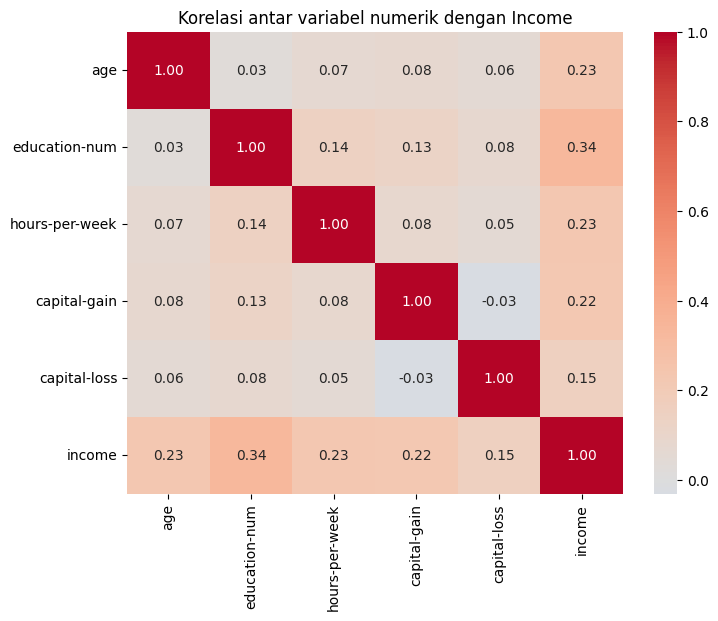

income            1.000000
education-num     0.335154
age               0.234037
hours-per-week    0.229689
capital-gain      0.223329
capital-loss      0.150526
Name: income, dtype: float64


In [36]:
# Ambil subset variabel numerik yang relevan
corr_cols = ['age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', 'income']
corr_matrix = df[corr_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title("Korelasi antar variabel numerik dengan Income")
plt.show()

print(corr_matrix['income'].sort_values(ascending=False))


In [ ]:
#Income & Education-num → korelasi positif cukup kuat
#Semakin tinggi tingkat pendidikan (education-num), semakin besar peluang memiliki income > 50K.

#Income & Capital-gain → korelasi positif paling kuat
#Orang dengan capital-gain tinggi (misalnya dari investasi/asset) cenderung berpenghasilan >50K.

#Income & Age → korelasi positif moderat
#Semakin tua (hingga batas produktif), cenderung berpenghasilan lebih tinggi.

#Income & Hours-per-week → korelasi positif lemah
#Jam kerja lebih banyak sedikit berhubungan dengan pendapatan tinggi, tapi tidak signifikan.

#Income & Capital-loss → korelasi lemah tapi positif
#Capital-loss sedikit terkait dengan income tinggi, mungkin karena orang berpenghasilan tinggi juga punya potensi kerugian investasi.

In [37]:
# Fetch data and inspect data shape
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Load train & test split
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train shape: (60000, 28, 28)
Test shape: (10000, 28, 28)


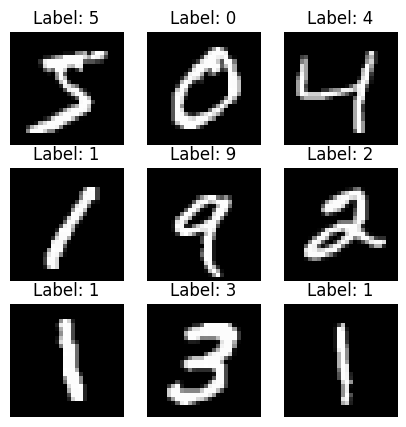

In [38]:
# Inspeksi Visual
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.show()

Train upsampled shape: (60000, 32, 32)
Test upsampled shape: (10000, 32, 32)


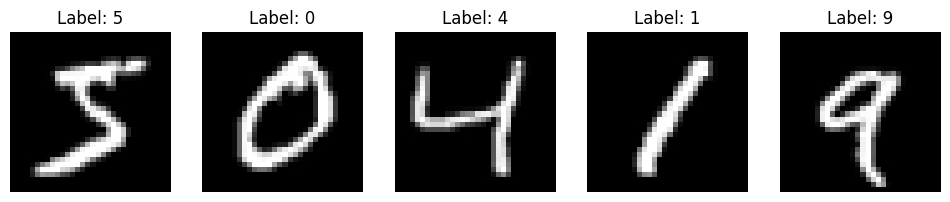

In [39]:
import cv2

#ukuran baru
new_size = (32, 32)

# Buat array kosong untuk hasil upsampling
X_train_up = np.zeros((X_train.shape[0], 32, 32), dtype=np.float32)
X_test_up  = np.zeros((X_test.shape[0], 32, 32), dtype=np.float32)

#Proses upsampling untuk seluruh data train & test
for i in range(X_train.shape[0]):
    X_train_up[i] = cv2.resize(X_train[i], new_size, interpolation=cv2.INTER_CUBIC)

for i in range(X_test.shape[0]):
    X_test_up[i] = cv2.resize(X_test[i], new_size, interpolation=cv2.INTER_CUBIC)

print("Train upsampled shape:", X_train_up.shape)
print("Test upsampled shape:", X_test_up.shape)

#Visualisasi 5 sampel hasil upsampling
plt.figure(figsize=(12,3))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(X_train_up[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.show()


Train min: 0.0 max: 1.0
Test  min: 0.0 max: 1.0


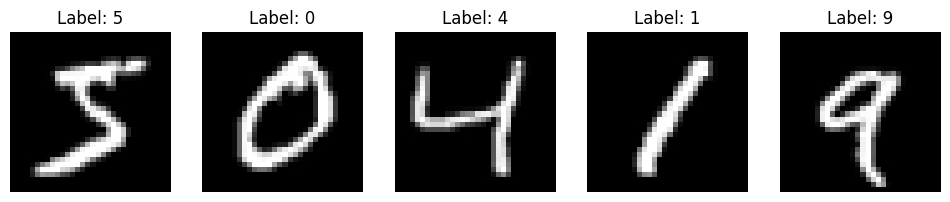

In [40]:
# Normalisasi data train & test
X_train_norm = X_train_up / 255.0
X_test_norm  = X_test_up / 255.0

print("Train min:", X_train_norm.min(), "max:", X_train_norm.max())
print("Test  min:", X_test_norm.min(),  "max:", X_test_norm.max())

# Visualisasi contoh hasil normalisasi
plt.figure(figsize=(12,3))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(X_train_norm[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.show()


Before flatten: (10000, 32, 32)
After flatten: (10000, 1024)


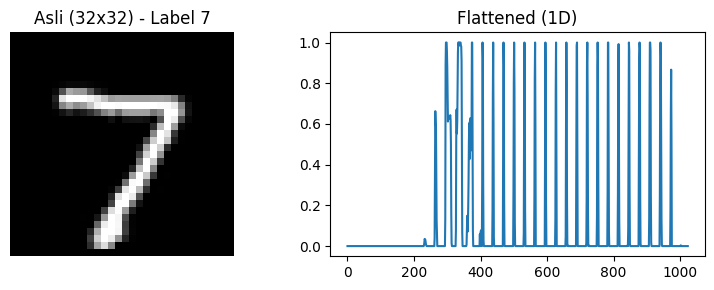

In [41]:
# Bentuk awal data test setelah resize & normalisasi
print("Before flatten:", X_test_norm.shape)  # (10000, 32, 32)

# Buat holder array kosong untuk hasil flatten
X_test_flat = np.zeros((X_test_norm.shape[0], 32*32))

# Lakukan flatten per data
for i in range(X_test_norm.shape[0]):
    X_test_flat[i] = X_test_norm[i].flatten()

print("After flatten:", X_test_flat.shape)  # (10000, 1024)

# Contoh: tampilkan 1 sample sebelum dan sesudah flatten
plt.figure(figsize=(8,3))

plt.subplot(1,2,1)
plt.imshow(X_test_norm[0], cmap="gray")
plt.title(f"Asli (32x32) - Label {y_test[0]}")
plt.axis("off")

plt.subplot(1,2,2)
plt.plot(X_test_flat[0])
plt.title("Flattened (1D)")
plt.tight_layout()
plt.show()
